In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training11.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.042594,0.069670,0.233757,0.132539,0.078830,0.128298,0.127252,0.028799,0.092669,0.0,...,0.129430,0,0.000000,0.0,0.0,0.0,0.129430,0.0,0,208500
1,0.013152,0.082892,0.258426,0.107690,0.122852,0.120843,0.119857,0.000000,0.123243,0.0,...,0.124259,0,0.000000,0.0,0.0,0.0,0.124259,0.0,0,181500
2,0.040965,0.069394,0.308067,0.126509,0.075178,0.122255,0.121322,0.022985,0.061598,0.0,...,0.124978,0,0.000000,0.0,0.0,0.0,0.124978,0.0,0,223500
3,0.047630,0.060798,0.256542,0.126379,0.075142,0.116660,0.119209,0.000000,0.027150,0.0,...,0.123944,0,0.124409,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.036753,0.077239,0.355347,0.129696,0.066782,0.108574,0.107688,0.044761,0.074829,0.0,...,0.112651,0,0.000000,0.0,0.0,0.0,0.112651,0.0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.142333,0.153551,0.334565,0.524853,-0.315803,-0.472650,-0.499125,0.430345,0.332447,-0.033716,...,-0.354417,NaN,-0.131030,-0.050800,-0.019783,-0.048756,-0.249486,0.333237,NaN,1.000000
GrLivArea,0.120719,0.127222,0.008331,0.458779,-0.189161,-0.218697,-0.219837,0.314464,0.031921,-0.061258,...,-0.151926,NaN,-0.057856,-0.043154,0.007535,-0.002907,-0.103951,0.118027,NaN,0.607572
BsmtQual_Ex,-0.067336,0.110156,0.067300,0.348260,-0.213320,-0.159737,-0.176944,0.292843,0.219931,-0.043845,...,-0.294995,NaN,-0.055523,-0.015651,-0.027086,-0.035153,-0.231383,0.342712,NaN,0.530566
TotalBsmtSF,-0.249588,0.188220,0.075357,0.407939,-0.225604,-0.121166,-0.151733,0.281911,0.423329,0.085864,...,-0.222430,NaN,-0.033628,-0.063965,-0.074703,0.025350,-0.163098,0.229862,NaN,0.526490
GarageCars,-0.018763,0.150428,0.031077,0.494672,-0.234319,-0.088925,-0.128104,0.308173,0.161393,-0.066607,...,-0.213203,NaN,-0.114808,-0.109711,0.015857,-0.012673,-0.130096,0.257483,NaN,0.524947
OverallQual,0.168467,0.066253,-0.315555,1.000000,0.013580,0.245853,0.217332,0.300476,0.115412,-0.102320,...,-0.132284,NaN,-0.088225,-0.040849,-0.075064,-0.019867,-0.064936,0.266964,NaN,0.524853
GarageArea,-0.093239,0.183610,0.084616,0.432730,-0.215405,-0.131911,-0.167525,0.309273,0.214881,-0.039942,...,-0.235569,NaN,-0.102522,-0.106532,-0.014841,-0.017159,-0.141364,0.262419,NaN,0.524351
KitchenQual_Ex,-0.045219,0.075053,0.082089,0.310253,-0.121018,-0.163811,-0.169290,0.214144,0.184403,-0.036469,...,-0.210962,NaN,0.004694,-0.014103,-0.024406,-0.031675,-0.205273,0.250091,NaN,0.481160
1stFlrSF,-0.239974,0.213064,0.017884,0.329802,-0.200665,-0.126223,-0.145328,0.251188,0.333430,0.065461,...,-0.210962,NaN,-0.033945,-0.040522,0.046827,0.030706,-0.160864,0.182668,NaN,0.467500
Foundation_PConc,0.095374,0.006098,-0.093198,0.553635,-0.264221,0.063893,0.026830,0.159577,0.056796,-0.147740,...,-0.176319,NaN,-0.095768,0.007612,-0.043421,-0.035719,-0.139283,0.306872,NaN,0.443080


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=GradientBoostingRegressor()

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'BsmtQual_Ex', 'TotalBsmtSF', 'GarageCars',
       'OverallQual', 'GarageArea', 'KitchenQual_Ex', '1stFlrSF',
       'Foundation_PConc'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,23334.227293,36304.496989,0.828167
1,11,23520.012943,36688.162915,0.824516
2,12,24335.240237,38490.908987,0.806847
3,13,24318.678344,37537.155305,0.816300
4,14,23707.238800,36842.652149,0.823035
...,...,...,...,...
105,115,17950.392430,27719.207464,0.899828
106,116,17792.052031,27807.892008,0.899186
107,117,17655.171008,27200.473575,0.903542
108,118,17706.149777,27555.871958,0.901005


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
69,79,17334.835731,26814.609415,0.906259
68,78,17347.524252,27446.157266,0.901791
83,93,17365.945628,27136.749587,0.903993
59,69,17406.499317,28090.573079,0.897126
77,87,17423.891023,27317.987234,0.902707
...,...,...,...,...
0,10,23334.227293,36304.496989,0.828167
1,11,23520.012943,36688.162915,0.824516
4,14,23707.238800,36842.652149,0.823035
3,13,24318.678344,37537.155305,0.816300


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


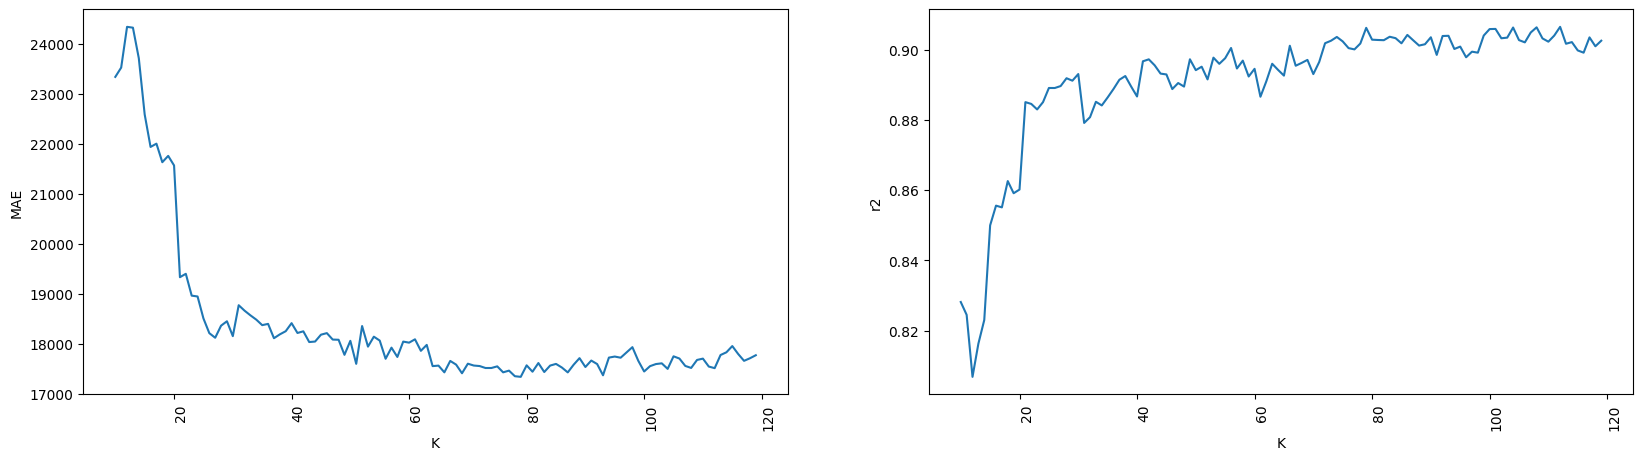

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               9.838685e-04
LotFrontage              4.121579e-04
LotArea                  1.359001e-02
OverallQual              6.131891e-04
OverallCond              4.291545e-04
                             ...     
SaleCondition_Family     2.350442e-04
SaleCondition_Normal     2.429358e-03
SaleCondition_Partial    1.656760e-03
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,17749.496429,27053.932786,0.904578
1,101,17653.509825,26752.927554,0.906690
2,102,17682.455102,26838.555153,0.906092
3,103,18316.107573,28175.369810,0.896504
4,104,18551.908507,28436.939276,0.894573
...,...,...,...,...
395,495,38481.534660,61917.439504,0.500182
396,496,38505.575784,61961.596782,0.499469
397,497,38530.124740,61952.270700,0.499619
398,498,38481.137738,61917.427295,0.500182


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
1,101,17653.509825,26752.927554,0.906690
2,102,17682.455102,26838.555153,0.906092
0,100,17749.496429,27053.932786,0.904578
6,106,18269.232891,28195.605148,0.896355
5,105,18269.802434,28116.893331,0.896933
...,...,...,...,...
396,496,38505.575784,61961.596782,0.499469
385,485,38524.312690,61979.229740,0.499184
393,493,38524.709612,61979.241936,0.499183
397,497,38530.124740,61952.270700,0.499619


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


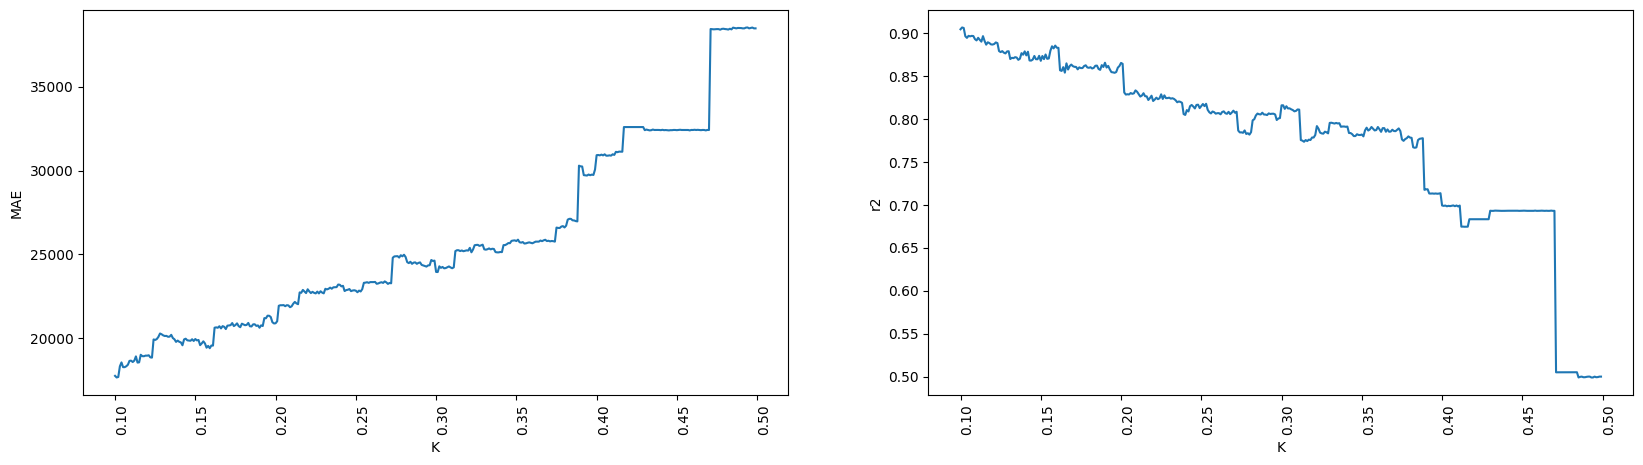

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


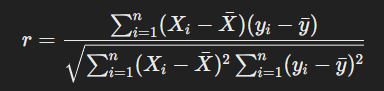

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.5248525198657468


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['GrLivArea', 0.6075721273224745]]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'BsmtQual_Ex'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,23500.875907,35383.467064,0.836775
1,6,23532.960271,36006.489803,0.830976
2,7,23743.253523,37229.479209,0.819299
3,8,23957.384330,37576.358769,0.815916
4,9,23370.465084,36445.319209,0.826831
...,...,...,...,...
110,115,17490.221648,26912.652653,0.905572
111,116,17543.696971,26938.834889,0.905389
112,117,17618.160184,27029.234919,0.904752
113,118,17796.269139,27370.982646,0.902329


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
76,81,17278.872332,26775.380864,0.906533
70,75,17294.061482,27264.744858,0.903085
66,71,17306.590347,27152.888451,0.903879
85,90,17338.479475,27082.571656,0.904376
79,84,17340.629165,26795.066619,0.906396
...,...,...,...,...
8,13,23622.200028,36636.092841,0.825014
2,7,23743.253523,37229.479209,0.819299
3,8,23957.384330,37576.358769,0.815916
6,11,24259.829927,38317.423990,0.808584


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


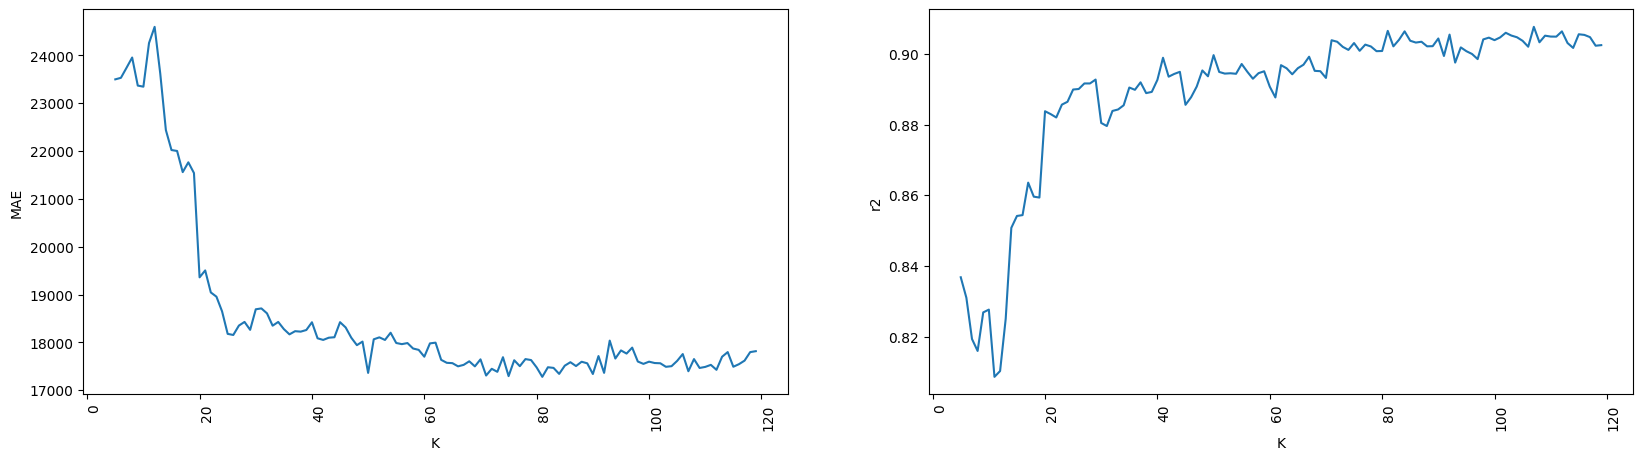

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

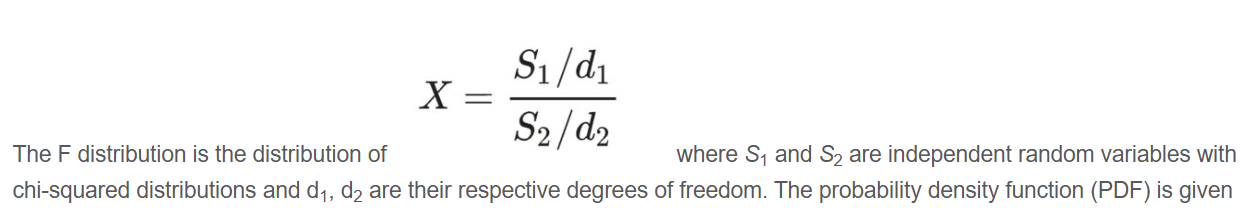

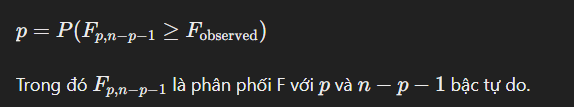

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,23963.238504,35782.677262,0.833071
1,6,23584.921052,34690.058861,0.843110
2,7,22752.134458,33198.468387,0.856311
3,8,20971.138537,31307.429604,0.872215
4,9,20736.615853,30643.578797,0.877576
...,...,...,...,...
110,115,16395.532455,25491.615143,0.915281
111,116,16459.958312,25614.368551,0.914463
112,117,16553.831427,25955.372417,0.912170
113,118,16432.564276,25549.653474,0.914895


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
43,48,15623.440946,24589.050784,0.921174
44,49,16064.626107,25224.324180,0.917048
73,78,16216.518306,24615.109759,0.921007
48,53,16252.576840,25626.176976,0.914384
78,83,16310.987956,24995.054377,0.918549
...,...,...,...,...
4,9,20736.615853,30643.578797,0.877576
3,8,20971.138537,31307.429604,0.872215
2,7,22752.134458,33198.468387,0.856311
1,6,23584.921052,34690.058861,0.843110


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


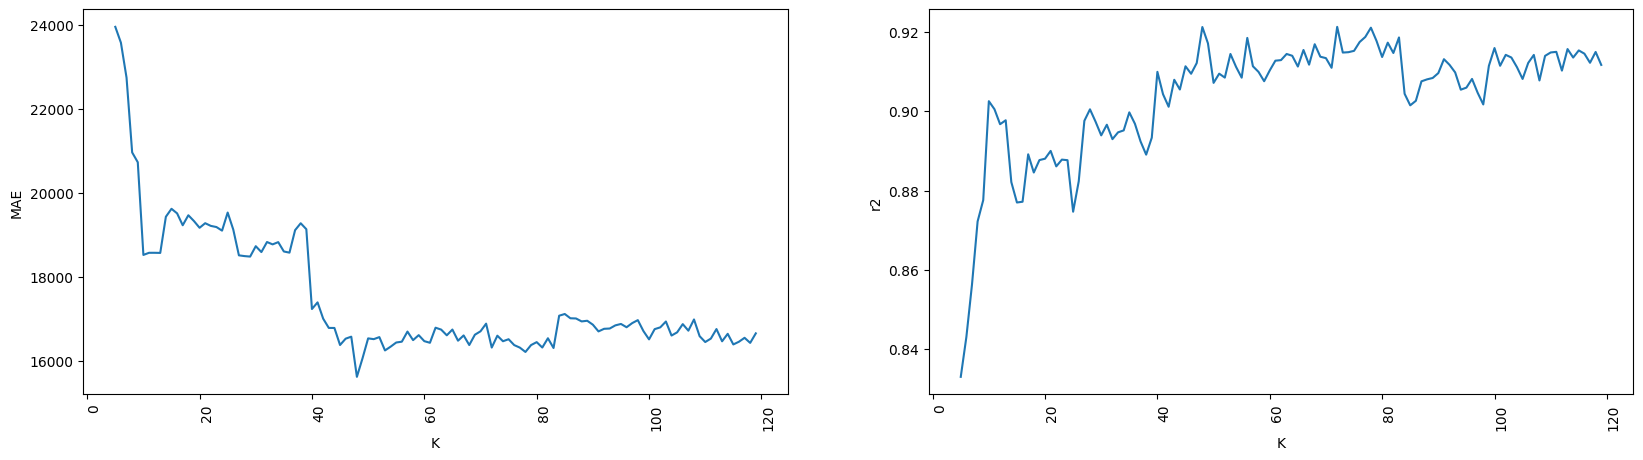

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

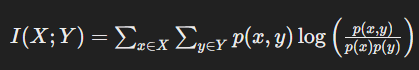

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

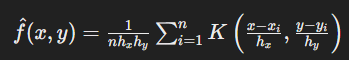

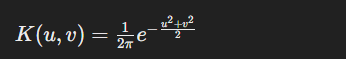

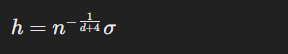

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,30301.542177,49425.329971,0.681518
1,6,28243.712241,44384.842084,0.743164
2,7,26614.387090,39340.671493,0.798224
3,8,26001.591499,39068.030520,0.801011
4,9,26767.870618,40037.786189,0.791010
...,...,...,...,...
110,115,17080.476268,27030.325599,0.904745
111,116,16876.232421,26460.528696,0.908718
112,117,17024.528194,26965.878799,0.905198
113,118,17035.879971,27224.725013,0.903370


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
83,88,16349.303304,25726.591302,0.913712
84,89,16397.225974,25181.478685,0.917330
78,83,16421.031732,25508.542223,0.915168
80,85,16642.259333,26007.310405,0.911819
79,84,16726.103464,26576.933630,0.907914
...,...,...,...,...
3,8,26001.591499,39068.030520,0.801011
2,7,26614.387090,39340.671493,0.798224
4,9,26767.870618,40037.786189,0.791010
1,6,28243.712241,44384.842084,0.743164


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_19116\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


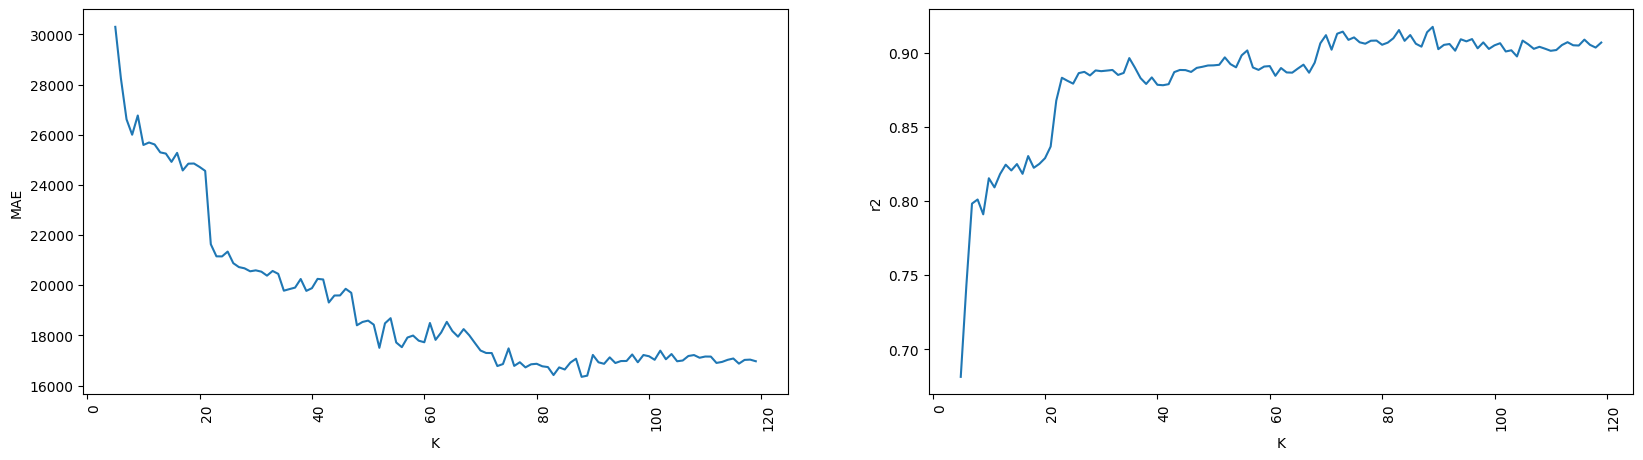

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,23500.875907,35383.467064,0.836775
1,6,23532.960271,36006.489803,0.830976
2,7,23743.253523,37229.479209,0.819299
3,8,23957.384330,37576.358769,0.815916
4,9,23370.465084,36445.319209,0.826831
...,...,...,...,...
110,115,17490.221648,26912.652653,0.905572
111,116,17543.696971,26938.834889,0.905389
112,117,17618.160184,27029.234919,0.904752
113,118,17796.269139,27370.982646,0.902329


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,23963.238504,35782.677262,0.833071
1,6,23584.921052,34690.058861,0.843110
2,7,22752.134458,33198.468387,0.856311
3,8,20971.138537,31307.429604,0.872215
4,9,20736.615853,30643.578797,0.877576
...,...,...,...,...
110,115,16395.532455,25491.615143,0.915281
111,116,16459.958312,25614.368551,0.914463
112,117,16553.831427,25955.372417,0.912170
113,118,16432.564276,25549.653474,0.914895


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,30301.542177,49425.329971,0.681518
1,6,28243.712241,44384.842084,0.743164
2,7,26614.387090,39340.671493,0.798224
3,8,26001.591499,39068.030520,0.801011
4,9,26767.870618,40037.786189,0.791010
...,...,...,...,...
110,115,17080.476268,27030.325599,0.904745
111,116,16876.232421,26460.528696,0.908718
112,117,17024.528194,26965.878799,0.905198
113,118,17035.879971,27224.725013,0.903370


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,23500.875907,35383.467064,0.836775,23963.238504,35782.677262,0.833071
1,6,23532.960271,36006.489803,0.830976,23584.921052,34690.058861,0.843110
2,7,23743.253523,37229.479209,0.819299,22752.134458,33198.468387,0.856311
3,8,23957.384330,37576.358769,0.815916,20971.138537,31307.429604,0.872215
4,9,23370.465084,36445.319209,0.826831,20736.615853,30643.578797,0.877576
...,...,...,...,...,...,...,...
110,115,17490.221648,26912.652653,0.905572,16395.532455,25491.615143,0.915281
111,116,17543.696971,26938.834889,0.905389,16459.958312,25614.368551,0.914463
112,117,17618.160184,27029.234919,0.904752,16553.831427,25955.372417,0.912170
113,118,17796.269139,27370.982646,0.902329,16432.564276,25549.653474,0.914895


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,23500.875907,35383.467064,0.836775,23963.238504,35782.677262,0.833071,30301.542177,49425.329971,0.681518
1,6,23532.960271,36006.489803,0.830976,23584.921052,34690.058861,0.843110,28243.712241,44384.842084,0.743164
2,7,23743.253523,37229.479209,0.819299,22752.134458,33198.468387,0.856311,26614.387090,39340.671493,0.798224
3,8,23957.384330,37576.358769,0.815916,20971.138537,31307.429604,0.872215,26001.591499,39068.030520,0.801011
4,9,23370.465084,36445.319209,0.826831,20736.615853,30643.578797,0.877576,26767.870618,40037.786189,0.791010
...,...,...,...,...,...,...,...,...,...,...
110,115,17490.221648,26912.652653,0.905572,16395.532455,25491.615143,0.915281,17080.476268,27030.325599,0.904745
111,116,17543.696971,26938.834889,0.905389,16459.958312,25614.368551,0.914463,16876.232421,26460.528696,0.908718
112,117,17618.160184,27029.234919,0.904752,16553.831427,25955.372417,0.912170,17024.528194,26965.878799,0.905198
113,118,17796.269139,27370.982646,0.902329,16432.564276,25549.653474,0.914895,17035.879971,27224.725013,0.903370


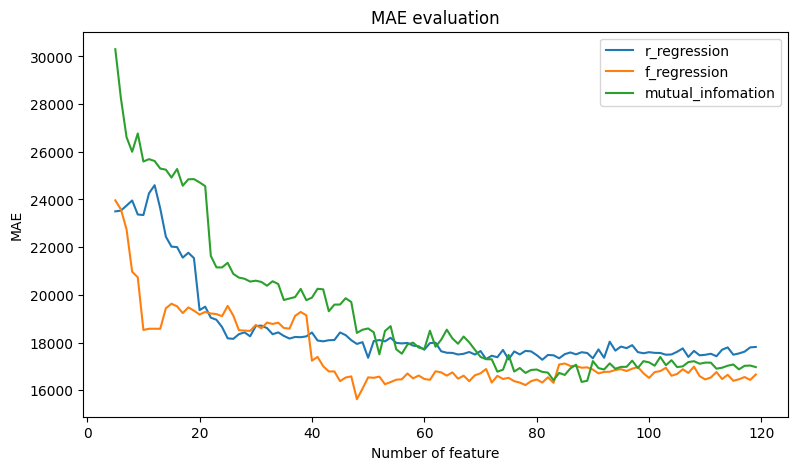

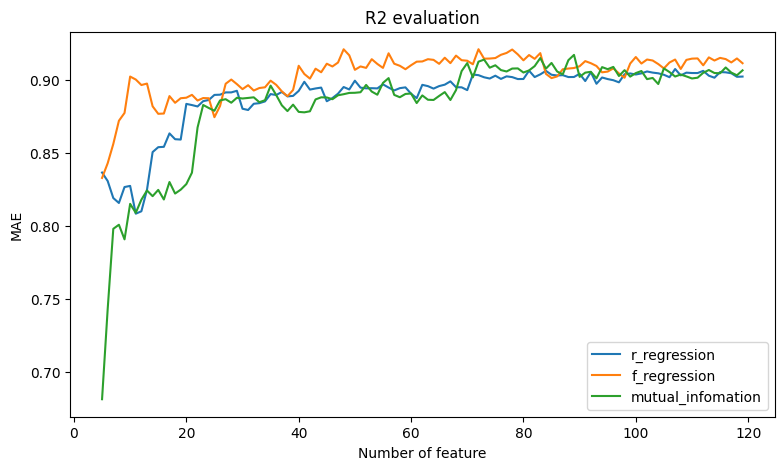

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()